# Beam Profile From a Single Transducer Element 

## Radiated sound from a vibrating surface: The Rayleigh integral
The radiated field from a vibrating surface in a rigid baffle is calculated from the Rayleigh integral
$$
p(\vec r,t)= \iint_{S_1} \frac {1}{2\pi R}  \frac {\partial v_n(t-R/c)}{\partial t }  dS_1
$$
The following calculations will be done in the frequency domain, where the Rayleigh integral is transformed to
$$
\begin{aligned}
p(\vec r,t) &= Re\{ \hat p (\vec r,\omega) e^{j\omega t} \} &
\hat p(\vec r,\omega)&= \frac{j\rho c k v_0}{2\pi}\iint_{S_1} \frac {1}{R}  e^{j(\omega t-R/c)} \xi(x_1,y_1) dS_1
\end{aligned}
$$
Note that the short pulses, as used in e.g. medical ultrasound imaging, are broadband and must me described by a range of frequencies. This smears out some of the phenomena found for one frequency, such as side lobes. However, the main properties concerning beam width and shape are the same as for single frequency pulses.

<div>
<img src="fraunhofer-drawing.png" alt="Alternative text" width="600" />

</div>)


## Far-field approximation
Evaluation of the Rayleigh integral at any position in front of any vibrating surface can only be done numerically. However, approximate solutions can be found for some common aperture shapes in the far-field, i.e., at large distance from the source. The far-field approximations are also valid in the focal region of focused transducers. 

The Fraunhofer approximation is based on two assumptions
#### Amplitude
The variations in the amplitude factor $\frac{1}{2\pi R}$ are small when $R$ varies over the aperture $S_1=(x_1,y_1)$. These variations are ignored by setting $\frac{1}{2\pi R} \approx \frac{1}{2\pi r}$.

#### Phase 
The phase factor $e^{-j\omega R/c}$  interference between waves from different positions on the aperture. These differences in $R$ need not be small compared to the wavelength $\lambda$ , and are included to the first order by the approximation
$$
R= \sqrt{ (x-x_1)^2 -(y-y_1)^2 -z^2 )} \approx r - \frac{xx_1}{r} - \frac{yy_1}{r} = r-x_1 \sin\theta - y_1 \sin\phi
$$
This approximation reduces $R$ to a function of the distance $r$ from the aparture center and two direction angles $\theta$ and $\phi$.


#### Beam profile in the far-field
$$
\begin{aligned}
\hat p(\vec r,\omega)& \approx \frac{j\rho c k v_0}{2\pi r} e^{-jkr}\iint_{S_1} e^{j(k_x x_1 + k_y y_1) } \xi(x_1,y_1) dS_1
\end{aligned}
$$

This result can consists of three factors that can be interpreted as
$$
\begin{aligned}
A(r)&= \frac{j\rho c k v_0}{2\pi r} & & \text{Amplitude decays proportional to distance, as $1/r$} \\
    &e^{-jkr}                       & & \text{Phase factor, usually not very interesting} \\
D(\theta,\phi) &= \iint_{S_1} e^{j(k_x x_1 + k_y y_1) } \xi(x_1,y_1) dS_1 & &\text{Variation with angle, often called the Dirctivity function } \\
\end{aligned}
$$
Note that $D(\theta,\phi)$ is the 2D spatial Fourier-transformation of the apodization function $\xi(x_1,y_1)$. This allows fast and easy numerical calculationsby using the FFT-function built into most software tools. 

The integral for $D(\theta,\phi)$ can be solved analytically for simple apertures. Classic and important examples are rectqangular and circular apertures with uniform oscillation amplitude, i.e. $\xi(x_1,y_1)=1$ on the aperture and $\xi(x_1,y_1)=0$ outside. See the lecture notes for details.

$$
\begin{aligned}
&\text{Rectangular aperture} & D(\theta,\phi)& = \frac{1}{wh} sinc \left( \frac{w}{\lambda}\sin \theta \right) sinc \left( \frac{h}{\lambda}\sin \phi \right)  \: ,&
sinc(u) &= \frac{\sin(\pi u)}{\pi u} \\
&\text{Circular aperture} & D(\theta) & = \frac{2 J_1(k a \sin\theta)}{k a \sin\theta}
    = jinc \left( \frac{D}{\lambda} \sin\theta \right) 
      \: ,& jinc(u)&=  \frac{2J_1(\pi u)}{\pi u}   & D&=2a
\end{aligned}
$$
where $J_1(x)$ is the Bessel function of the fist kind and order one. The jinc-function is introduced analogous to the sinc-function. Note that different definitions exist for the sinc- and jinc-functions, e.g., without the $\pi$ and the factor 2.


Label(value='Lateral Beam-profile from Single Element Transducer', style=LabelStyle(font_weight='bold'))

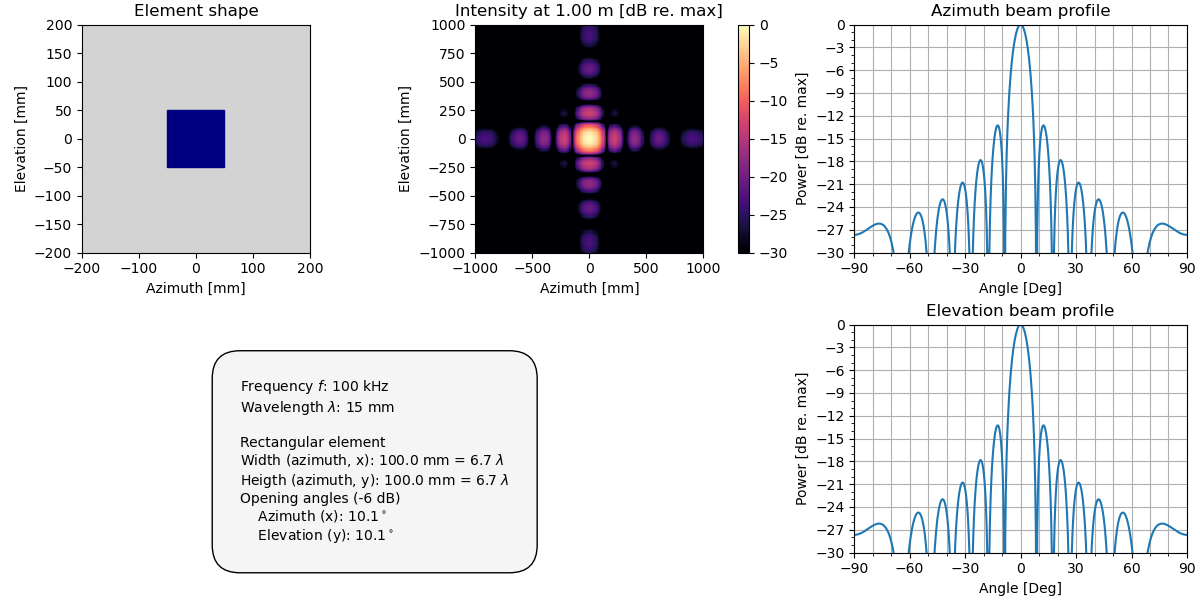

In [6]:
%matplotlib ipympl

import single_element_beam_pattern
import ipywidgets as widgets

#  Function that runs the demo interactively
def run_beampattern_demo(circular, frequency, width, height):
    """Set values and call plotting function."""
    aperture.circular = circular
    aperture.frequency = frequency*1e3
    aperture.width = width*1e-3
    aperture.height = height*1e-3

    aperture.display_result()
    return

aperture = single_element_beam_pattern.SingleElement()

title_widget = widgets.Label("Lateral Beam-profile from Single Element Transducer", style=dict(font_weight='bold'))

width  = '80%'
widget_style = {'description_width': 'initial'}

label = ['Width (Diameter)', 'Height']
label_widget = [widgets.Label(labeltext,
                              layout=widgets.Layout(width='20%'), 
                              style=widget_style) 
                for labeltext in label]

shape_widget = widgets.Dropdown(options=[('Rectangular', False), ('Circular', True)], 
                                value=False, 
                                description=' ', 
                                layout=widgets.Layout(width='70%'), 
                                style=widget_style)

element_layout = widgets.Layout(width='70%')
width_widget = widgets.FloatSlider(min=1, max= 400, value=100, step=1, 
                                   continuous_update=True,
                                   readout_format='.0f',
                                   description='[mm]',  
                                   layout=element_layout,
                                   style=widget_style)

height_widget = widgets.FloatSlider(min= 1, max= 400, value=100, step=1, 
                                   continuous_update=True,
                                   readout_format='.0f',
                                   description='[mm]', 
                                   layout=element_layout,
                                   style=widget_style)

frequency_widget = widgets.FloatSlider(min= 1, max= 400, value= 100, step=1, 
                                       continuous_update=True,
                                       readout_format='.0f',
                                       description='Frequency [kHz]', 
                                       layout=widgets.Layout(width='70%'), 
                                       style=widget_style)

w_widget_line = widgets.HBox([label_widget[0], width_widget])
h_widget_line = widgets.HBox([label_widget[1], height_widget])

widget_col_1 = widgets.VBox([shape_widget], layout=widgets.Layout(width='15%'))
widget_col_2 = widgets.VBox([w_widget_line, h_widget_line], layout=widgets.Layout(width='40%'))
widget_col_3 = widgets.VBox([frequency_widget], layout=widgets.Layout(width='40%'))

widget_grid = widgets.HBox([widget_col_1, widget_col_2, widget_col_3], layout=widgets.Layout(width='80%'))

# Create lines of parameter widgets 
display(title_widget)
display(widget_grid)

int = widgets.interactive(run_beampattern_demo,
                          circular=shape_widget,
                          frequency=frequency_widget, 
                          width=width_widget, 
                          height=height_widget)